<a href="https://colab.research.google.com/github/LuizFilipeAv/An-lise-de-Vendas/blob/main/DesafioPratico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sobre o desafio
A empresa fictícia TechStore forneceu um arquivo com o histórico de vendas de produtos.

Sua missão é realizar uma análise exploratória para responder perguntas de negócio e gerar algumas visualizações simples.

## Modelo de dados (arquivo vendas.csv)
O arquivo vendas.csv contém o histórico de vendas de produtos. As colunas esperadas são:

- produto (string)
- categoria (string)
- quantidade (inteiro)
- preco_unitario (float)
- regiao (string)
- data_venda (data)

## Requisitos
- Carregar os dados a partir do arquivo vendas.csv.
- Exibir informações básicas:
    - Mostrar as 5 primeiras linhas do dataset.
    - Exibir o número total de registros (linhas).
    - Calcular a receita total (coluna quantidade multiplicada pela coluna preco_unitario).
- Fazer consultas específicas:
  - Filtrar e exibir as vendas da categoria "Eletrônicos".
  - Identificar e exibir o produto mais vendido (em quantidade).
  - Descobrir e exibir a região com maior valor de compras.

## Desafio extra (opcional)
- Gerar visualizações:
  - Gráfico de barras mostrando a receita por categoria.
  - Gráfico de linha mostrando a evolução das vendas por mês.
- Extra (opcional):
  - Criar um relatório exportado em .xlsx ou .pdf.
  - Montar uma tabela dinâmica com receita por região × categoria.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df_vendas_raw = pd.read_csv('/content/drive/MyDrive/Projeto Dados 1/vendas.csv')

### Primeira etapa:
- Exibir informações básicas
- Mostrar as 5 primeiras linhas
- Exibir o número total de registros
- Mostrar as 5 últimas linhas (extra)

In [ ]:
#Mostrando as 5 primeiras linhas

df_vendas_raw.head()

,data,produto,categoria,quantidade,preco_unitario,cliente,regiao
0,2025-12-09,Headset G,Periféricos,1,2759,Fernanda,Sudeste
1,2025-03-12,Armário P,Móveis,2,4516,Rafael,Norte
2,2025-11-24,Mesa Escritório N,Móveis,1,4347,Rafael,Sudeste
3,2025-09-14,Tênis T,Vestuário,3,3046,Ana,Norte
4,2025-08-03,Boné V,Vestuário,2,4453,Bruno,Centro-Oeste


In [ ]:
#Mostrando as 5 últimas linhas

df_vendas_raw.tail()

,data,produto,categoria,quantidade,preco_unitario,cliente,regiao
95,2025-02-08,Impressora I,Periféricos,3,4561,Fernanda,Nordeste
96,2025-10-16,Celular A,Eletrônicos,1,2046,Carla,Sul
97,2025-03-15,Celular A,Eletrônicos,5,4390,Carla,Nordeste
98,2025-02-07,Calça U,Vestuário,5,2472,Rafael,Norte
99,2025-05-06,Camisa R,Vestuário,4,3800,Maria,Centro-Oeste


In [ ]:
#Exibindo informações básicas

df_vendas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            100 non-null    object
 1   produto         100 non-null    object
 2   categoria       100 non-null    object
 3   quantidade      100 non-null    int64 
 4   preco_unitario  100 non-null    int64 
 5   cliente         100 non-null    object
 6   regiao          100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [ ]:
df_vendas_raw.describe()

,quantidade,preco_unitario
count,100.000000,100.000000
mean,3.160000,2763.610000
std,1.308249,1489.366328
min,1.000000,81.000000
25%,2.000000,1603.000000
50%,3.000000,2750.500000
75%,4.000000,4269.750000
max,5.000000,4974.000000


In [ ]:
df_vendas_raw.shape

(100, 7)

### Segunda etapa
- Calcular a receita total
- Fazer consultas específicas
- Filtrar e exibir as vendas da categoria "Eletrônicos"

In [ ]:
#Calculando a receita total

df_vendas_raw['receita_total'] = df_vendas_raw['quantidade'] * df_vendas_raw['preco_unitario']

df_vendas_raw

,data,produto,categoria,quantidade,preco_unitario,cliente,regiao,receita_total,valor_venda
0,2025-12-09,Headset G,Periféricos,1,2759,Fernanda,Sudeste,2759,2759
1,2025-03-12,Armário P,Móveis,2,4516,Rafael,Norte,9032,9032
2,2025-11-24,Mesa Escritório N,Móveis,1,4347,Rafael,Sudeste,4347,4347
3,2025-09-14,Tênis T,Vestuário,3,3046,Ana,Norte,9138,9138
4,2025-08-03,Boné V,Vestuário,2,4453,Bruno,Centro-Oeste,8906,8906
...,...,...,...,...,...,...,...,...,...
95,2025-02-08,Impressora I,Periféricos,3,4561,Fernanda,Nordeste,13683,13683
96,2025-10-16,Celular A,Eletrônicos,1,2046,Carla,Sul,2046,2046
97,2025-03-15,Celular A,Eletrônicos,5,4390,Carla,Nordeste,21950,21950
98,2025-02-07,Calça U,Vestuário,5,2472,Rafael,Norte,12360,12360


In [ ]:
#Fazendo consultas específicas - Filtrando e exibindo vendas da categoria "Eletrônicos"

eletronicos = df_vendas_raw[df_vendas_raw['categoria'] == 'Eletrônicos']
eletronicos

,data,produto,categoria,quantidade,preco_unitario,cliente,regiao,receita_total
5,2025-07-24,Tablet D,Eletrônicos,2,4893,Fernanda,Sudeste,9786
6,2025-05-20,Monitor B,Eletrônicos,1,3060,Lucas,Sul,3060
9,2025-06-01,Celular A,Eletrônicos,3,516,João,Centro-Oeste,1548
10,2025-04-22,Celular A,Eletrônicos,2,1018,Fernanda,Nordeste,2036
13,2025-11-24,Notebook X,Eletrônicos,1,2670,Ana,Sul,2670
14,2025-05-30,Tablet D,Eletrônicos,4,2575,Maria,Nordeste,10300
15,2025-09-19,Notebook X,Eletrônicos,2,2778,Rafael,Norte,5556
27,2025-01-30,Notebook X,Eletrônicos,5,1006,Lucas,Sudeste,5030
32,2025-07-07,Tablet D,Eletrônicos,2,2533,Camila,Sul,5066
33,2025-11-20,Notebook X,Eletrônicos,4,3998,Pedro,Nordeste,15992


In [ ]:
#Fazendo consultas específicas - identificar e exibir o produto mais vendido (em quantidade)

vendas_por_produto = df_vendas_raw.groupby('produto')['quantidade'].sum().reset_index()
mais_vendido_df = vendas_por_produto.nlargest(1, 'quantidade')
display(mais_vendido_df)


,produto,quantidade
15,Sofá Q,30


In [ ]:
#Fazendo consultas específicas - Descobrir a região com maior valor de compras

df_vendas_raw['valor_venda'] = df_vendas_raw['quantidade'] * df_vendas_raw['preco_unitario']
vendas_por_regiao = df_vendas_raw.groupby('regiao')['valor_venda'].sum().reset_index()
regiao_campea = vendas_por_regiao.nlargest(1, 'valor_venda')
display(regiao_campea)

,regiao,valor_venda
3,Sudeste,245605


## Extra
- Gráfico de barras mostrando a receita por categoria
- Gráfico de linha mostrando a evolução das vendas por mês

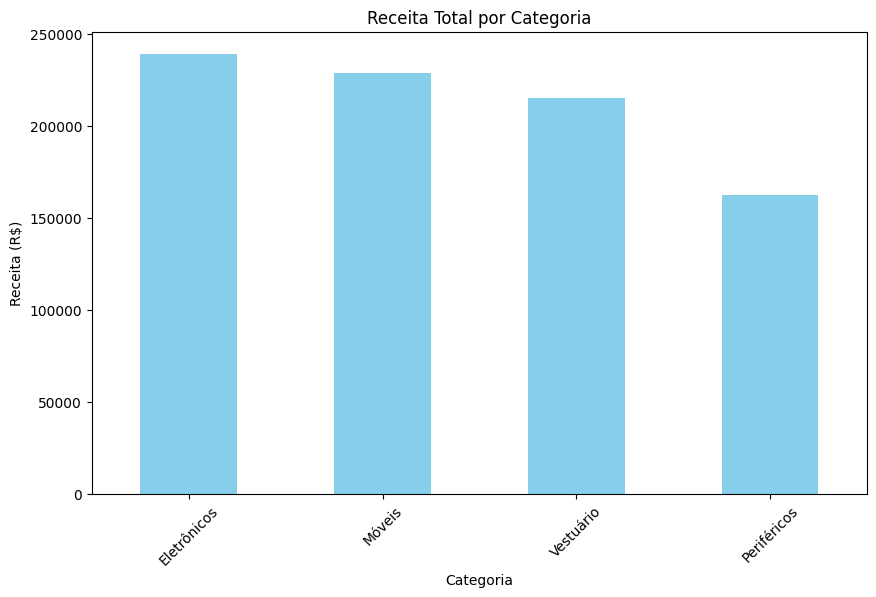

In [ ]:
#Gráfico de barras mostrando a receita por categoria

import matplotlib.pyplot as plt

receita_categoria = df_vendas_raw.groupby('categoria')['receita_total'].sum().sort_values(ascending=False)

receita_categoria.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Receita Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1158264100.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df_vendas_raw.set_index('data').resample('M')['receita_total'].sum()


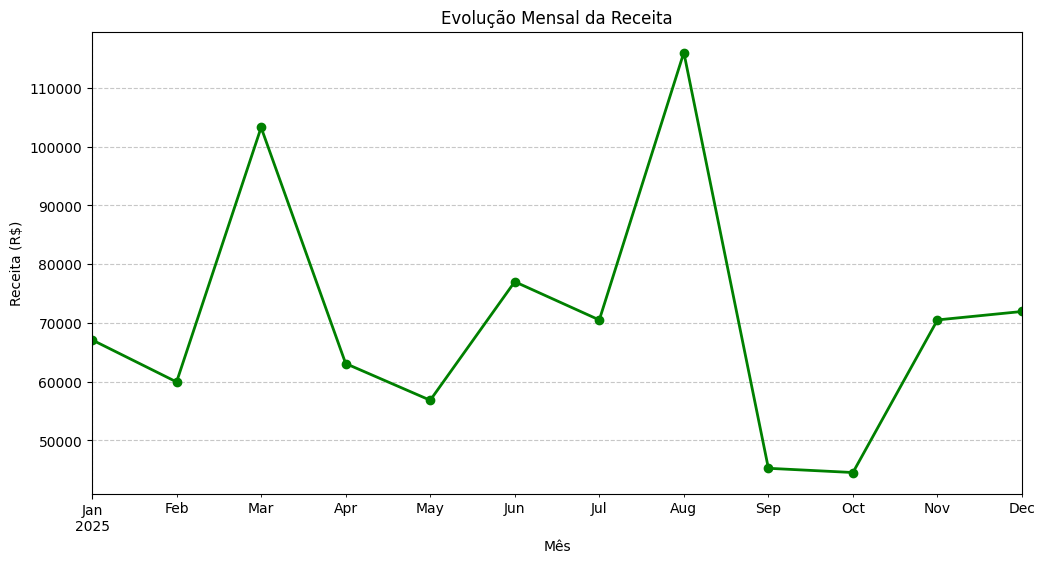

In [ ]:
#Gráfico de linha mostrando a evolução das vendas por mês
df_vendas_raw['data'] = pd.to_datetime(df_vendas_raw['data'])

vendas_mensais = df_vendas_raw.set_index('data').resample('M')['receita_total'].sum()

plt.figure(figsize=(12, 6))
vendas_mensais.plot(kind='line', marker='o', color='green', linewidth=2)

plt.title('Evolução Mensal da Receita')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()